# TensorFlow/Keras Basics Notebook
### *Build your first neural networks & CNNs*

## Importing Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Build a Simple Neural Network

In [3]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-22 10:25:18.956935: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Train Model on Random Data
(Demo purpose only)

In [4]:
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5020 - loss: 0.7204
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4870 - loss: 0.7021
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4890 - loss: 0.6985
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 0.6962
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5010 - loss: 0.6946


## Build a Simple CNN

In [5]:
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
cnn.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN on Dummy Images

In [6]:
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X, y, epochs=3)

Epoch 1/3
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4785 - loss: 0.6961

2025-12-22 10:27:26.953162: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25189632 exceeds 10% of free system memory.
2025-12-22 10:27:27.027441: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25189632 exceeds 10% of free system memory.
2025-12-22 10:27:27.072101: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25189632 exceeds 10% of free system memory.
2025-12-22 10:27:27.114387: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25189632 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5150 - loss: 0.6979
Epoch 2/3


2025-12-22 10:27:27.162200: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25189632 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5350 - loss: 0.6870
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5450 - loss: 0.6790


## Build a U-Net Block (Foundation for Segmentation Models)

In [7]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

inp = layers.Input((128,128,1))
out = conv_block(inp, 16)
unet_demo = models.Model(inp, out)
unet_demo.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 2,480 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

## **Exercises**
1. Modify the CNN to include **Dropout**.
2. Add more convolution layers to increase accuracy.
3. Build the **encoder part** of U-Net using conv_block.
4. Train CNN on a real dataset (MNIST or CIFAR10).
5. Plot training curves (loss & accuracy) using matplotlib.


In [8]:
def conv_block(input_tensor, filters):
    # Layer A: Look for patterns
    x = layers.Conv2D(filters, kernel_size=3, padding='same', activation='relu')(input_tensor)
    
    # Exercise 1: Add Dropout
    # This randomly turns off 20% of the neurons to prevent memorization (overfitting).
    x = layers.Dropout(0.2)(x)
    
    # Layer B: Look for patterns again (refining what Layer A saw)
    x = layers.Conv2D(filters, kernel_size=3, padding='same', activation='relu')(x)
    
    # Exercise 2: Add an extra layer
    # Making the network "deeper" allows it to understand more complex shapes.
    x = layers.Conv2D(filters, kernel_size=3, padding='same', activation='relu')(x)
    
    return x

In [9]:
# 1. Define the Input
# We use (28, 28, 1) because the MNIST images we will use later are 28x28 pixels in black & white (1 channel).
inp = layers.Input((28, 28, 1))

# 2. Block 1 (The detailed look)
c1 = conv_block(inp, 16)      # Look for 16 types of patterns
p1 = layers.MaxPooling2D((2, 2))(c1) # Shrink image size by half (28x28 -> 14x14)

# 3. Block 2 (The zoom out)
c2 = conv_block(p1, 32)       # Look for 32 types of patterns
p2 = layers.MaxPooling2D((2, 2))(c2) # Shrink image size by half (14x14 -> 7x7)

# 4. Block 3 (The deep summary)
# This is the bottom of the "U". It holds the most abstract information.
c3 = conv_block(p2, 64)       # Look for 64 types of patterns

print("Encoder structure built.")

Encoder structure built.


In [10]:
# Flatten the 3D block into a 1D list
flat = layers.Flatten()(c3)

# The Decision Layer
# 10 units = digits 0 through 9
# 'softmax' = converts the math score into a % probability (e.g., 90% chance it's a "5")
out = layers.Dense(10, activation='softmax')(flat)

# Stitch it all together into a Model
model = models.Model(inputs=inp, outputs=out)

# Print a summary to see what we built
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,658 (592.41 KB)

 Trainable params: 151,658 (592.41 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# --- STEP 1: Build the Model Structure ---

# Define the input (28x28 grayscale image)
inp = layers.Input((28, 28, 1))

# Define the helper block (Convolution + Dropout)
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Dropout(0.2)(x) # Dropout prevents cheating
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

# Build the Encoder (The "U-Net" style downsampling)
c1 = conv_block(inp, 16)
p1 = layers.MaxPooling2D((2, 2))(c1)

c2 = conv_block(p1, 32)
p2 = layers.MaxPooling2D((2, 2))(c2)

c3 = conv_block(p2, 64)

# Add the Classifier Head (Flatten -> Decision)
flat = layers.Flatten()(c3)
out = layers.Dense(10, activation='softmax')(flat)


# We explicitly name the variable 'model' right here.
model = models.Model(inputs=inp, outputs=out)


# --- STEP 2: Load Data & Train ---

print("Loading MNIST data...")
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize & Reshape
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

print("Compiling...")
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

print("Training (this may take a moment)...")
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

2025-12-22 10:37:35.433879: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Loading MNIST data...
Compiling...
Training (this may take a moment)...
Epoch 1/5


2025-12-22 10:37:36.119144: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


   3/1875 ━━━━━━━━━━━━━━━━━━━━ 2:20 75ms/step - accuracy: 0.1233 - loss: 2.3008

2025-12-22 10:37:38.132474: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 24837120 exceeds 10% of free system memory.
2025-12-22 10:37:38.140316: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 24837120 exceeds 10% of free system memory.
2025-12-22 10:37:38.146170: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 22804992 exceeds 10% of free system memory.
2025-12-22 10:37:38.150854: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 22804992 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9510 - loss: 0.1571 - val_accuracy: 0.9890 - val_loss: 0.0373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9883 - val_loss: 0.0360
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9873 - loss: 0.0400 - val_accuracy: 0.9914 - val_loss: 0.0268
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9913 - val_loss: 0.0237
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9911 - val_loss: 0.0280


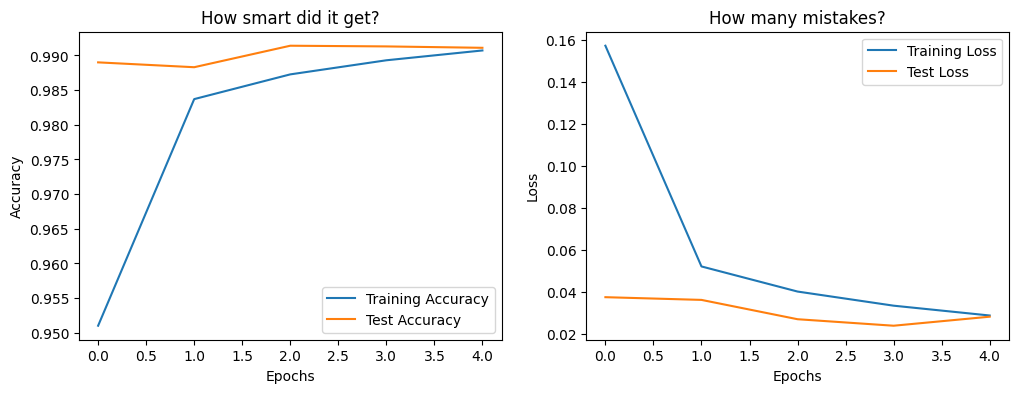

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
# Plot Accuracy (Higher is better)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('How smart did it get?')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss (Lower is better)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('How many mistakes?')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()